In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch import linalg as LA
from torch.utils.data import DataLoader
from transformers import logging
from transformers import pipeline
from tqdm import tqdm

In [2]:
from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer, AutoModel

In [3]:
from relation_templates.templates import relations, nominalized_relations, get_templates, get_relation_meta, relations, relation_names, get_relation_cardinality, get_relations_with_last_digit

In [4]:
from TRExData.LamaTRExData import LamaTRExData
from TRExData.AbstractTRExData import AbstractTRExData
from TRExData.HardTRExData import HardKnownTRExData

In [5]:
from RelationEmbeddingComparison.RelationEmbeddingComparison import RelationEmbeddingComparison, build_row
#from ResultData.ComparisonPersistor import ComparisonPersistor

In [6]:
MASK = "[MASK]"
#MASK = "<mask>"

In [7]:
#keys = ["simple","compound","complex","compound-complex", "active", "passive", "nominalized"]
keys = ["simple","compound","complex","compound-complex"]

In [8]:
logging.set_verbosity_error()

In [9]:
model='bert-base-cased'
#model='bert-large-cased'
#model='bert-base-uncased'
#model='bert-large-uncased'
#model='bert-base-multilingual-cased'
#model='bert-base-multilingual-uncased'
#model='roberta-base'
#model='roberta-large'

In [10]:
metric_name = "cosine similarity"

In [11]:
tokenizer = AutoTokenizer.from_pretrained(model)

In [12]:
feature_extractor = pipeline("feature-extraction", model=model)

In [13]:
#relations = get_relations_with_last_digit(3)[2:]+get_relations_with_last_digit(4)+get_relations_with_last_digit(5)+get_relations_with_last_digit(6)+get_relations_with_last_digit(7)+get_relations_with_last_digit(8)+get_relations_with_last_digit(9)
#relations = nominalized_relations

In [14]:
list(enumerate(relations)), len(relations)

([(0, 'P159'),
  (1, 'P37'),
  (2, 'P1412'),
  (3, 'P138'),
  (4, 'P495'),
  (5, 'P17'),
  (6, 'P178'),
  (7, 'P103'),
  (8, 'P20'),
  (9, 'P36'),
  (10, 'P407'),
  (11, 'P190'),
  (12, 'P276'),
  (13, 'P108'),
  (14, 'P31'),
  (15, 'P364'),
  (16, 'P27'),
  (17, 'P30'),
  (18, 'P47'),
  (19, 'P1376'),
  (20, 'P106'),
  (21, 'P413'),
  (22, 'P937'),
  (23, 'P449'),
  (24, 'P131'),
  (25, 'P1303'),
  (26, 'P127'),
  (27, 'P279'),
  (28, 'P740'),
  (29, 'P19'),
  (30, 'P527'),
  (31, 'P136'),
  (32, 'P264'),
  (33, 'P1001'),
  (34, 'P39'),
  (35, 'P101'),
  (36, 'P140'),
  (37, 'P361'),
  (38, 'P530'),
  (39, 'P463'),
  (40, 'P176')],
 41)

In [15]:
TREx = LamaTRExData(relations = relations)
#TREx = AbstractTRExData(relations=relations)
#TREx = HardKnownTRExData(get_hard_filter, get_known_filter, relations = relations

In [16]:
TREx.load()

In [17]:
comparer = RelationEmbeddingComparison(feature_extractor, tokenizer, relations, get_templates, get_relation_meta, keys=keys, mask=MASK)

In [18]:
comparer.compare(TREx.data)

P159 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 967/967 [02:46<00:00,  5.79it/s]


P37 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 966/966 [02:52<00:00,  5.61it/s]


P1412 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 969/969 [02:54<00:00,  5.56it/s]


P138 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 645/645 [01:55<00:00,  5.56it/s]


P495 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 909/909 [02:45<00:00,  5.50it/s]


P17 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 930/930 [02:50<00:00,  5.47it/s]


P178 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 592/592 [01:49<00:00,  5.40it/s]


P103 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 977/977 [03:02<00:00,  5.34it/s]


P20 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 953/953 [02:53<00:00,  5.51it/s]


P36 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 703/703 [02:10<00:00,  5.40it/s]


P407 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 877/877 [02:38<00:00,  5.54it/s]


P190 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 995/995 [03:00<00:00,  5.50it/s]


P276 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 959/959 [02:50<00:00,  5.64it/s]


P108 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 383/383 [01:10<00:00,  5.42it/s]


P31 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 922/922 [02:50<00:00,  5.42it/s]


P364 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 856/856 [02:12<00:00,  6.46it/s]


P27 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 966/966 [02:51<00:00,  5.65it/s]


P30 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 975/975 [02:42<00:00,  5.98it/s]


P47 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 922/922 [02:44<00:00,  5.61it/s]


P1376 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:42<00:00,  5.50it/s]


P106 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 958/958 [02:58<00:00,  5.38it/s]


P413 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 952/952 [02:49<00:00,  5.60it/s]


P937 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 954/954 [02:49<00:00,  5.64it/s]


P449 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 881/881 [02:36<00:00,  5.63it/s]


P131 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 881/881 [02:35<00:00,  5.66it/s]


P1303 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 949/949 [02:42<00:00,  5.86it/s]


P127 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 687/687 [02:01<00:00,  5.65it/s]


P279 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 964/964 [02:47<00:00,  5.75it/s]


P740 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 936/936 [02:45<00:00,  5.65it/s]


P19 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 944/944 [02:46<00:00,  5.67it/s]


P527 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 976/976 [02:52<00:00,  5.67it/s]


P136 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 931/931 [02:23<00:00,  6.50it/s]


P264 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 429/429 [01:17<00:00,  5.55it/s]


P1001 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 701/701 [02:08<00:00,  5.46it/s]


P39 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 892/892 [02:55<00:00,  5.08it/s]


P101 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 696/696 [02:14<00:00,  5.19it/s]


P140 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 473/473 [01:28<00:00,  5.37it/s]


P361 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 932/932 [02:51<00:00,  5.45it/s]


P530 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 996/996 [02:51<00:00,  5.79it/s]


P463 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 225/225 [00:42<00:00,  5.33it/s]


P176 :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 982/982 [03:03<00:00,  5.36it/s]


In [19]:
comparer.print_rows()

P159,135.62869262695312,126.95535278320312,127.63996887207031,126.69734954833984
P37,155.2091522216797,159.1038055419922,156.34498596191406,148.78684997558594
P1412,142.7165069580078,144.97189331054688,147.658203125,151.46055603027344
P138,137.70448303222656,128.33255004882812,131.41184997558594,126.86909484863281
P495,132.28909301757812,135.44190979003906,146.76239013671875,140.15414428710938
P17,124.41129302978516,135.8699188232422,120.77916717529297,131.3081817626953
P178,142.4044952392578,136.7589111328125,138.78919982910156,142.29345703125
P103,170.29161071777344,150.9488067626953,160.76705932617188,144.85263061523438
P20,149.3275909423828,141.2751922607422,143.7257080078125,142.55992126464844
P36,129.2766876220703,127.35714721679688,128.4629364013672,129.8708038330078
P407,149.66058349609375,142.51800537109375,144.8671875,153.08583068847656
P190,123.18234252929688,125.21239471435547,124.35517120361328,120.91146087646484
P276,121.37276458740234,123.66264343261719,123.5280838012695

In [21]:
rels = []
mean_data = []
std_data = []

for relation, values in comparer.results.items():
    mean_row = build_row(relation, 0, values)
    mean_data.append(mean_row[1:])
    
    std_row = build_row(relation, 1, values)
    std_data.append(std_row[1:])
    
    rels.append(relation)


In [66]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_embeddind_comparison(data, x_names, y_names, title):

    np_data = np.array(data, dtype='float32')


    fig, ax = plt.subplots(figsize = (10,40))
    im = ax.imshow(np_data)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(x_names)), labels=x_names)
    ax.set_yticks(np.arange(len(y_names)), labels=y_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_names)):
        for j in range(len(x_names)):
            text = ax.text(j, i, np_data[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

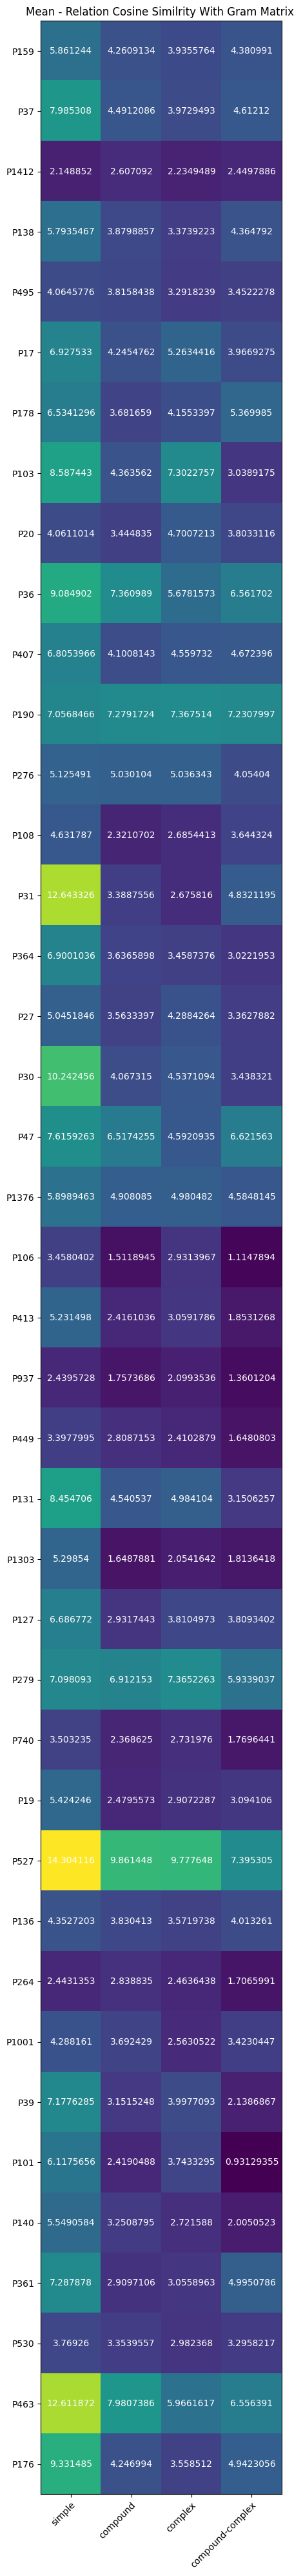

In [67]:
plot_embeddind_comparison(std_data, keys, rels, "Mean - Relation Cosine Similrity With Gram Matrix ")

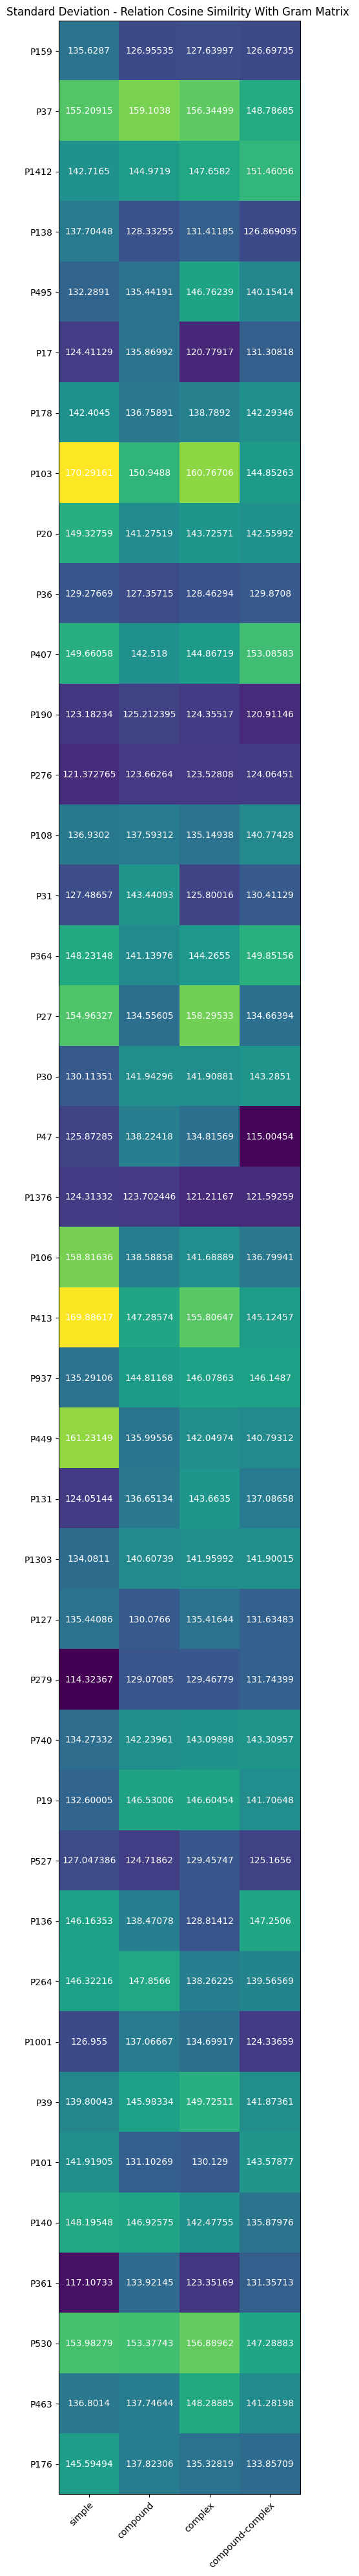

In [68]:
plot_embeddind_comparison(mean_data, keys, rels, "Standard Deviation - Relation Cosine Similrity With Gram Matrix ")